**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Ejercicio 2 - Densidades y varias variables

Autores:



*   Diego A. Gómez
*   Natalia A. kunzmann
*   Natalia C. Graselli
*   Patricia V. Gonzalez
*   M. Virginia Romero Messein

##Lectura y Filtrado Dataset 

Ahora no necesitamos separar cada lenguaje ingresado por el programador en instancias distintas, por lo que vamos a volver al dataset original y filtrar por las columnas y filas que nos interesan. 

In [ ]:
# Importamos las librerías
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy


In [ ]:
#Definimos el estilo de los graficos

#Definimos que vamos a usar una paleta de verdes y rosas
PiYG_r = sns.color_palette("PiYG_r", 10)
sns.set_palette(PiYG_r)
#sns.palplot(PiYG_r)

#Definimos que el fondo de los graficos va a ser blanco y que se va a mostrar la grilla
sns.set_style("whitegrid")

#Definimos que solo queremos que se muestren las lineas de los ejes de la izquierda y abajo
sns.despine(left=True, bottom=True)

#Definimos el tamaño de los graficos, de la fuente y de los renglones
sns.set_context("talk", font_scale = .5, rc={"grid.linewidth": 0.6})

<Figure size 432x288 with 0 Axes>

In [ ]:
# Cargamos los datos
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
# Se observan los datos en el data frame
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


En primer lugar, vamos a **filtrar por columnas relevantes**, nuestro objetivo en este ejercicio es estudiar distribución y comportamiento de datos cuando trabajamos con varias variables a la vez. Para ello, elegimos trabajar con las siguientes variables:


*   Categóricas Ordinales: Nivel de estudios
*   Categóricas No Ordinales: Género
*   Numéricas Continuas: Salario Bruto y Salario Neto
*   Numéricas Discretas: Edad, Antiguedad, Años de Experiencia

De esta manera, las columnas relevantes son:

In [ ]:
#Lista de columnas relevantes

relevant_columns = ['salary_monthly_BRUTO','salary_monthly_NETO',
                    'profile_gender','profile_age','profile_years_experience','work_years_in_company',
                    'profile_studies_level']

In [ ]:
#Creamos un nuevo dataframe con las columnas que nos interesan 

df_rel_cols = df[relevant_columns]

In [ ]:
df_rel_cols.head(3)

,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_age,profile_years_experience,work_years_in_company,profile_studies_level
0,53000.0,43000.0,Mujer,26,3.0,3.0,Universitario
1,79000.0,63000.0,Hombre,29,5.0,2.0,Universitario
2,160000.0,127000.0,Mujer,22,2.0,0.0,Secundario


Ahora, vamos a eliminar los **valores extremos de salario**, para ello, vamos a utilizar el mismo criterio que en el ejercicio anterior, y vamos a eliminar aquellas respuestas donde se indicó que el sueldo es menor al SMVM y/o mayor a $630.000 mensuales. Lo vamos a hacer tanto para el salario bruto como para el neto.

In [ ]:
#Filtramos valores extremos para Salario Bruto

filtered_bruto_df = df_rel_cols[(df_rel_cols.salary_monthly_BRUTO > 38940) & (df_rel_cols.salary_monthly_BRUTO < 630600)]

In [ ]:
filtered_bruto_df[:3]

,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_age,profile_years_experience,work_years_in_company,profile_studies_level
0,53000.0,43000.0,Mujer,26,3.0,3.0,Universitario
1,79000.0,63000.0,Hombre,29,5.0,2.0,Universitario
2,160000.0,127000.0,Mujer,22,2.0,0.0,Secundario


Para eliminar salarios extremos en Neto, es necesario cambiar los valores ya que el neto es al menos 20% menos que el Bruto. Para el valor maximo Bruto, el percentil 99 es 630k. Para el neto:

In [ ]:
#Percentil 99 para salario Nruto
bruto = df_rel_cols["salary_monthly_BRUTO"].quantile(0.99) 
bruto

630600.000000004

In [ ]:
#Percentil 99 para salario Neto
neto = df_rel_cols["salary_monthly_NETO"].quantile(0.99) 
neto

491800.0000000029

In [ ]:
#Relación entre Salario Bruto y Netp
relacion = (neto/bruto)*100
print(relacion.round(2), "%")

77.99 %


La relación es razonable teniendo en cuenta los descuentos obligatorios por ley. Ahora, para el valor minimo tomamos el 82% del valor del SMVM.

In [ ]:
#Calculo valor neto para SMVM

SMVM_neto = 38940*0.82

#Filtramos valores extremos

filtered_salary_df = filtered_bruto_df[(filtered_bruto_df.salary_monthly_NETO > SMVM_neto) & (filtered_bruto_df.salary_monthly_NETO < 491800)]

In [ ]:
filtered_salary_df

,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_age,profile_years_experience,work_years_in_company,profile_studies_level
0,53000.0,43000.0,Mujer,26,3.0,3.0,Universitario
1,79000.0,63000.0,Hombre,29,5.0,2.0,Universitario
2,160000.0,127000.0,Mujer,22,2.0,0.0,Secundario
3,130000.0,102000.0,Hombre,39,15.0,15.0,Posgrado
4,140000.0,106000.0,Hombre,32,9.0,6.0,Universitario
...,...,...,...,...,...,...,...
6088,69000.0,56450.0,Hombre,32,13.0,0.0,Secundario
6089,180000.0,130000.0,Hombre,32,10.0,3.0,Universitario
6090,99000.0,97000.0,Hombre,37,13.0,6.0,Terciario
6091,85000.0,71000.0,Hombre,38,12.0,5.0,Universitario


Ahora vamos a descartar aquellos que indicaron un valor extremos en las edades y nos vamos a quedar solo con aquellos que indicaron algun valor entre 18 (menos que eso sería trabajo adolescente) y 80 años (más de esa edad podrían estar jubilados). 

In [ ]:
#Filtramos salarios extemos para edad

filtered_age_df = filtered_salary_df[(filtered_salary_df.profile_age >= 18) & (filtered_salary_df.profile_age <= 80)]

In [ ]:
filtered_age_df

,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_age,profile_years_experience,work_years_in_company,profile_studies_level
0,53000.0,43000.0,Mujer,26,3.0,3.0,Universitario
1,79000.0,63000.0,Hombre,29,5.0,2.0,Universitario
2,160000.0,127000.0,Mujer,22,2.0,0.0,Secundario
3,130000.0,102000.0,Hombre,39,15.0,15.0,Posgrado
4,140000.0,106000.0,Hombre,32,9.0,6.0,Universitario
...,...,...,...,...,...,...,...
6088,69000.0,56450.0,Hombre,32,13.0,0.0,Secundario
6089,180000.0,130000.0,Hombre,32,10.0,3.0,Universitario
6090,99000.0,97000.0,Hombre,37,13.0,6.0,Terciario
6091,85000.0,71000.0,Hombre,38,12.0,5.0,Universitario


Si observamos la cantidad de respuestas por **categoria de nivel de estudio**, notamos que la categoría "Primario" solo tiene dos respuestas; es por ello, que creemos que no es significativa en el analsis y podemos no tenerla en cuenta.

In [ ]:
filtered_age_df['profile_studies_level'].value_counts()

Universitario    3568
Terciario         963
Secundario        363
Posgrado          294
Doctorado          24
Primario            2
Posdoctorado        2
Name: profile_studies_level, dtype: int64

In [ ]:
#Eliminamos las filas donde el nivel de estudios es Primario

df_clean = filtered_age_df[~filtered_age_df.profile_studies_level.isin(['Primario',])]

In [ ]:
df_clean[:3]

,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_age,profile_years_experience,work_years_in_company,profile_studies_level
0,53000.0,43000.0,Mujer,26,3.0,3.0,Universitario
1,79000.0,63000.0,Hombre,29,5.0,2.0,Universitario
2,160000.0,127000.0,Mujer,22,2.0,0.0,Secundario


Además, para que el analisis sea más enriquecedor, agrupamos a los Posgrados, Doctorados y Posdoctorados bajo una unica categoría. 

In [ ]:
#Esto se puede hacer con una función de la misma manera que el reemplazo de work_role,
#Sin embargo, como son poquitos los valores a reemplazar se puede también hacer con reemplazo directo.

#Remplazamos los valores de Doctorado
df_clean["profile_studies_level"] = df_clean["profile_studies_level"].replace("Doctorado", "Posgrados varios")

#Remplazamos los valores de Postdoctorado
df_clean["profile_studies_level"] = df_clean["profile_studies_level"].replace("Posdoctorado", "Posgrados varios")

#Remplazamos los valores de Posgrado
df_clean["profile_studies_level"] = df_clean["profile_studies_level"].replace("Posgrado", "Posgrados varios")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
df_clean['profile_studies_level'].value_counts()

Universitario       3568
Terciario            963
Secundario           363
Posgrados varios     320
Name: profile_studies_level, dtype: int64

##a) Densidad conjunta

**Consigna:** Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa.

Se utiliza el df filtrado con las columnas relevantes seleccionadas y se hace una matriz de correlación de las variables numéricas.

In [ ]:
matriz_correlacion_inicial = df.corr()
matriz_correlacion_inicial

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
profile_age,1.000000,0.009316,0.022181,0.027657,0.001154,-0.000541,-0.006752,-0.003909,0.005452,0.007943,0.013962,0.018650,0.002991,0.001167
profile_years_experience,0.009316,1.000000,0.512288,0.485628,0.096228,0.045961,0.250545,0.234471,-0.002998,-0.050249,-0.026175,-0.025907,-0.064246,-0.027675
work_years_in_company,0.022181,0.512288,1.000000,0.579205,0.116935,0.054418,0.019175,0.018223,-0.120715,-0.179082,-0.030476,-0.018353,-0.178880,-0.137251
work_years_in_current_position,0.027657,0.485628,0.579205,1.000000,0.029379,0.016424,0.039366,0.045107,-0.085018,-0.124151,-0.023831,-0.026088,-0.142257,-0.099066
work_people_in_charge_of,0.001154,0.096228,0.116935,0.029379,1.000000,0.003338,0.101176,0.077913,0.026433,0.024346,0.015548,0.023246,-0.000400,-0.009451
salary_on_call_duty_charge,-0.000541,0.045961,0.054418,0.016424,0.003338,1.000000,0.149794,0.169135,-0.000021,0.002596,0.007800,0.011848,-0.000033,-0.020966
salary_monthly_BRUTO,-0.006752,0.250545,0.019175,0.039366,0.101176,0.149794,1.000000,0.833335,0.344676,0.331435,0.010695,-0.009646,0.196381,0.115718
salary_monthly_NETO,-0.003909,0.234471,0.018223,0.045107,0.077913,0.169135,0.833335,1.000000,0.339314,0.324840,-0.018899,-0.043154,0.192391,0.095460
salary_satisfaction,0.005452,-0.002998,-0.120715,-0.085018,0.026433,-0.000021,0.344676,0.339314,1.000000,0.726729,0.135787,0.132682,0.511647,0.226400
salary_comparison_last_semester,0.007943,-0.050249,-0.179082,-0.124151,0.024346,0.002596,0.331435,0.324840,0.726729,1.000000,0.210132,0.180426,0.464407,0.206204


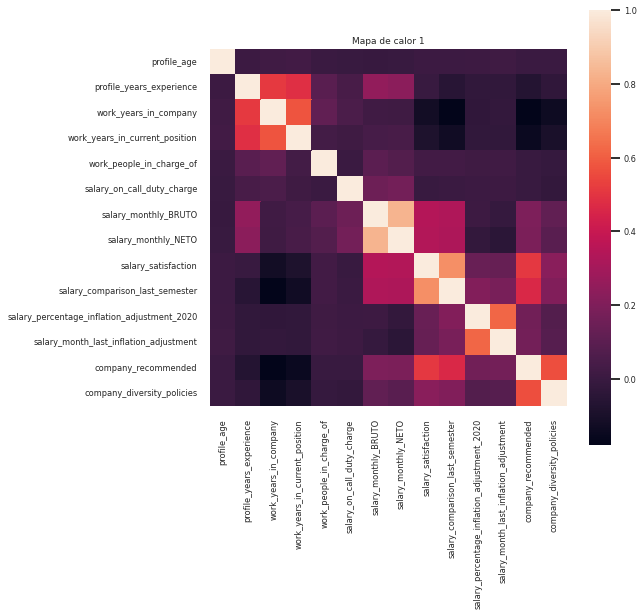

In [ ]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(matriz_correlacion_inicial, vmax=1, square=True)
plt.title("Mapa de calor 1")
plt.show()

En primer lugar, la única correlación fuerte que se encuentra es entre Salario Bruto y Neto, en segundo lugar, alguna correlación entre satisfacción salarial y Salario semsetre anterior. Se descarta la segunda correlación ya que no se encuentran las columans dentro de la elección de columnas relevantes a analizar.

Se hace misma correlación con las columnas relevantes seleccionadas y se grafica para mayor visualización en un heatmap:

In [ ]:
matriz_correlacion = df_clean.corr()
matriz_correlacion

,salary_monthly_BRUTO,salary_monthly_NETO,profile_age,profile_years_experience,work_years_in_company
salary_monthly_BRUTO,1.000000,0.946105,0.239407,0.312385,0.025807
salary_monthly_NETO,0.946105,1.000000,0.224468,0.284107,0.013335
profile_age,0.239407,0.224468,1.000000,0.824077,0.473370
profile_years_experience,0.312385,0.284107,0.824077,1.000000,0.507548
work_years_in_company,0.025807,0.013335,0.473370,0.507548,1.000000


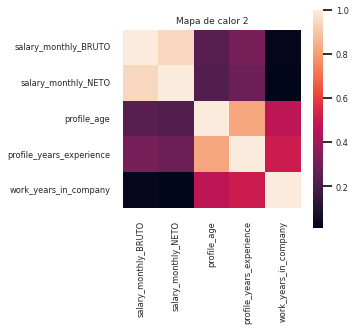

In [ ]:
f, ax = plt.subplots(figsize = (4, 4))
sns.heatmap(matriz_correlacion, vmax=1, square=True)
plt.title("Mapa de calor 2")
plt.show()

Para proseguir se eligen 3 variables numéricas:
*   salary_monthly_BRUTO
*   profile_age
*   work_years_in_company

y 2 categóricas:
*   profile_studies_level
*   profile_gender

Ya establecimos en la matriz de correlación anterior que no hay correlación ninguna entre las 3 variables numéricas elegidas.

Se procede a analizar distintas combinaciones de las 5 variables indicadas, siempre tomando como base el Salario BRUTO.

1.   Género vs Salario
2.   Estudios vs Salario
3.   Edad vs Salario
4.   Antiguedad vs Salario


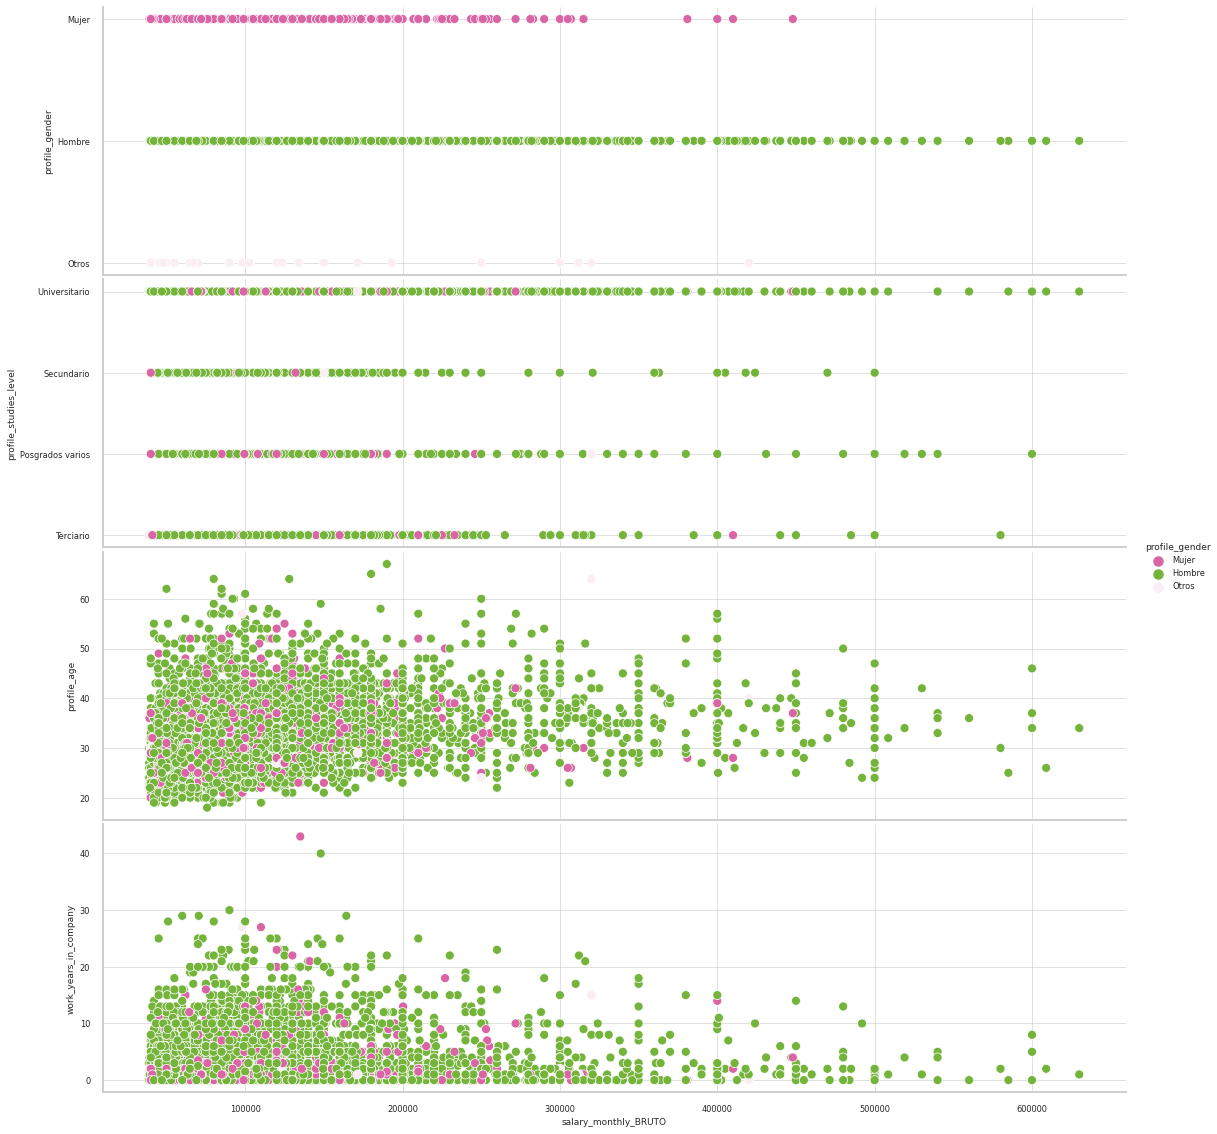

In [ ]:
color_hue = {'Mujer':PiYG_r[8], 'Hombre':PiYG_r[1], 'Otros':PiYG_r[5]}
sns.pairplot(data=df_clean,
                 y_vars=["profile_gender", "profile_studies_level", "profile_age", "work_years_in_company"],
                 x_vars=['salary_monthly_BRUTO'], hue = "profile_gender", aspect=4, height=4, palette = color_hue)
plt.show()

De los 4 gráficos de arriba se puede inferir que los Hombres y los Developers tienden a tener salarios más altos, mientras que la antiguedad y la edad de la persona pareciera no influir en el nivel del salario. De hecho tienden a tener algo mayores salarios las personas con menor antiguedad.

Luego analizamos las dos variables categóricas entre si:

In [ ]:
## Tabla de contingencia
tabla_contingencia = pd.crosstab(df_clean.profile_gender, df_clean.profile_studies_level)#, normalize=True)
tabla_contingencia

profile_studies_level,Posgrados varios,Secundario,Terciario,Universitario
profile_gender,,,,
Hombre,243,341,826,3002
Mujer,74,21,131,549
Otros,3,1,6,17


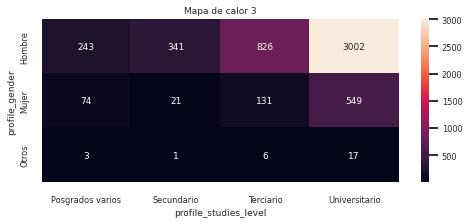

In [ ]:
fig = plt.figure(figsize=(8,3))

sns.heatmap(tabla_contingencia, annot=True, fmt='g')
plt.title("Mapa de calor 3")
plt.show()

Se observa que dentro de los encuestados hay una amplia mayoría de Hombres con estudios Universitarios.
Pero si se observa intra género, vemos que tanto para mujeres como para hombres, dentro de su género 76% tienen título univesitario o más (Universitario + Posgrados Varios). Se descarta el análisis de género "Otros", por no ser representativa la cantidad de personas dentro de ese grupo.

In [ ]:

df_extract = pd.concat([df_clean["profile_age"], df_clean["profile_studies_level"]], axis=1)

df_extract

filtered_df_extract = df_extract[df_extract.profile_studies_level.isin(["Posgrados varios"])]

filtered_df_extract

,profile_age,profile_studies_level
3,39,Posgrados varios
82,40,Posgrados varios
116,27,Posgrados varios
118,29,Posgrados varios
120,45,Posgrados varios
...,...,...
5995,46,Posgrados varios
6014,37,Posgrados varios
6052,39,Posgrados varios
6055,31,Posgrados varios


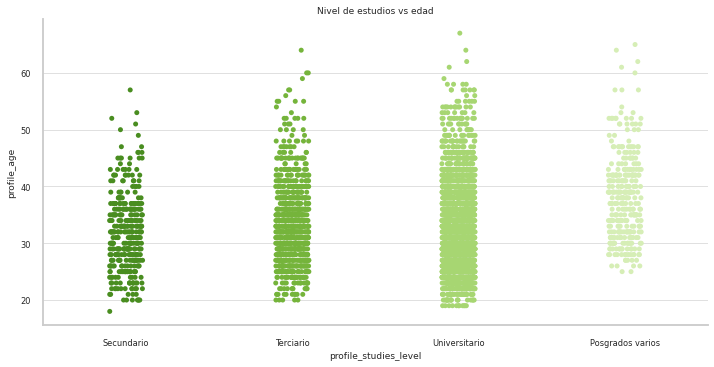

In [ ]:
## Nivel de estudios versus edad:
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario', 'Posgrados varios']

sns.catplot(data=df_clean, x='profile_studies_level',
                y='profile_age', order=sorted_studies_levels, height=5, aspect=2)
plt.title("Nivel de estudios vs edad")
plt.show()

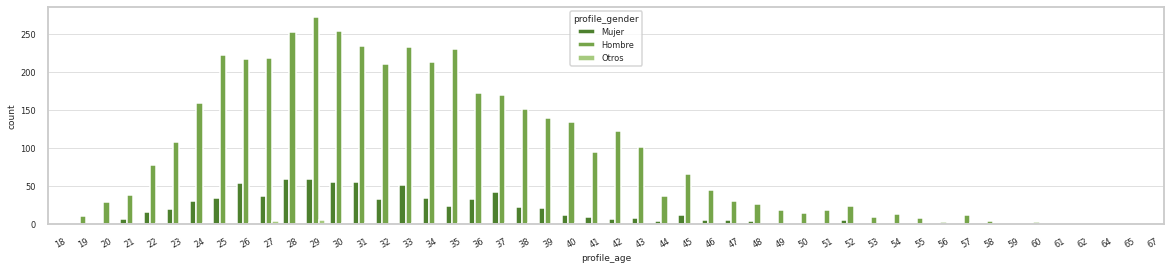

In [ ]:
fig = plt.figure(figsize=(20,4))
sns.countplot(data = df_clean, x= 'profile_age', hue='profile_gender')
plt.xticks(rotation=30)
plt.show()

## b) Asociación

Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple. Para ello, vamos a estudiar si existe algun tipo de correlación entre la variable salario bruto y salario neto. Para ello, vamos a calcular una serie de coeficientes de correlación y un grafico de regresión lineal.

La **covarianza** es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.


In [ ]:
#Numpy tiene una función integrada que calcula la covarianza entre dos variables numericas. Devuelve una matriz de covarianzas

matcov=np.cov(df_clean.dropna().salary_monthly_BRUTO, df_clean.dropna().salary_monthly_NETO)

#print('matriz de varianza covarianza:','\n',matcov,'\n')

print('La covarianza entre las variables es de:', matcov[0,1])

La covarianza entre las variables es de: 4394179550.897699


Observamos que la covarianza entre las variables es positiva. Esto significa que existe una correlación directa (positiva) entre el salario Bruto y el salario Neto; es decir, que varían en la misma dirección. Graficamente, esto se observa así:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


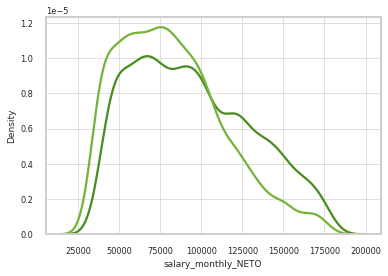

In [ ]:
df_bruto = df_clean[df_clean.salary_monthly_BRUTO < 180000].salary_monthly_BRUTO;
df_neto = df_clean[df_clean.salary_monthly_NETO < 180000].salary_monthly_NETO;

sns.distplot(df_bruto, hist=False, label = 'salario Bruto')
sns.distplot(df_neto, hist=False,  label = 'salario Neto')
plt.show()


La principal limitación de la covarianza es que, su magnitud, depende de las escalas en que se miden las variables estudiadas. Esto implica que no puede utilizarse para comparar el grado de asociación entre pares de variables medidas en distintas escalas. Una forma de evitar esta limitación y poder hacer comparaciones consiste en estandarizar la covarianza, generando lo que se conoce como coeficientes de correlación

Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

0: asociación nula.

0.1: asociación pequeña.

0.3: asociación mediana.

0.5: asociación moderada.

0.7: asociación alta.

0.9: asociación muy alta.

Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.

También podemos calcular el indice de **correlación de Pearson**, *p*. La correlación indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas. Se considera que dos variables cuantitativas están correlacionadas cuando los valores de una de ellas varían sistemáticamente con respecto a los valores homónimos de la otra.

In [ ]:
#Usamos la función de numpy corrcoef que calcula p, el coeficiente de Pearson

corr=np.corrcoef(df_clean.dropna().salary_monthly_BRUTO,df_clean.dropna().salary_monthly_NETO)
#print('matriz de correlaciones: \n ', corr,'\n')

print('Correlación entra ambas variables = p = ',corr[0,1],'\n')

Correlación entra ambas variables = p =  0.9461052217034593 



De esta manera, podemos decir que la asociacion entre el salario neto y bruto es positiva y muy alta. Esto se ve reflejado visualemente en el siguiente gráfico de regresión:

Text(0.5, 1.0, 'Gráfico de regresión')

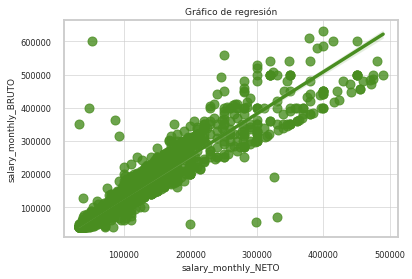

In [ ]:
ax = sns.regplot(x=df_clean.salary_monthly_NETO, y=df_clean.salary_monthly_BRUTO)
plt.title("Gráfico de regresión")

Para concluir, podemos decir que se puede eliminar la columna de salario bruto y trabajar únicamente con la de salario neto, puesto que estas dos están fuertemente relacionadas.

## c) Densidad condicional 

**Consigna:** Estudie la distribución del salario según el nivel de estudio. Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'` ¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto? Calcule medidas de centralización y dispersión para cada subpoblación


Primero observamos la frecuencia de cada subpoblación, tomamos las dos mas grandes: terciario y universitario. 

In [ ]:
df_clean.profile_studies_level.value_counts() 

Universitario       3568
Terciario            963
Secundario           363
Posgrados varios     320
Name: profile_studies_level, dtype: int64

In [ ]:
salary_net = "salary_monthly_NETO"
group_col = "profile_studies_level"

In [ ]:
#seleccionamos los grupos "Universitario" y "Terciario" por ser las dos subpoblaciones más numerosas

interesting_studies = ["Universitario", "Terciario"]

fil_studies_df = df_clean[df_clean.profile_studies_level.isin(interesting_studies)]
fil_studies_df[:3]

,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_age,profile_years_experience,work_years_in_company,profile_studies_level
0,53000.0,43000.0,Mujer,26,3.0,3.0,Universitario
1,79000.0,63000.0,Hombre,29,5.0,2.0,Universitario
4,140000.0,106000.0,Hombre,32,9.0,6.0,Universitario


**DISTRIBUCIÓN DE VARIABLES**

Se realizan dos histogramas para ver la distribución de salarios de Universitarios y Terciarios ya que son las dos subpoblaciones más numerosas.

In [ ]:
terciario_arr = fil_studies_df[fil_studies_df.profile_studies_level.isin(('Terciario',))].salary_monthly_NETO
universitario_arr = fil_studies_df[fil_studies_df.profile_studies_level.isin(('Universitario',))].salary_monthly_NETO

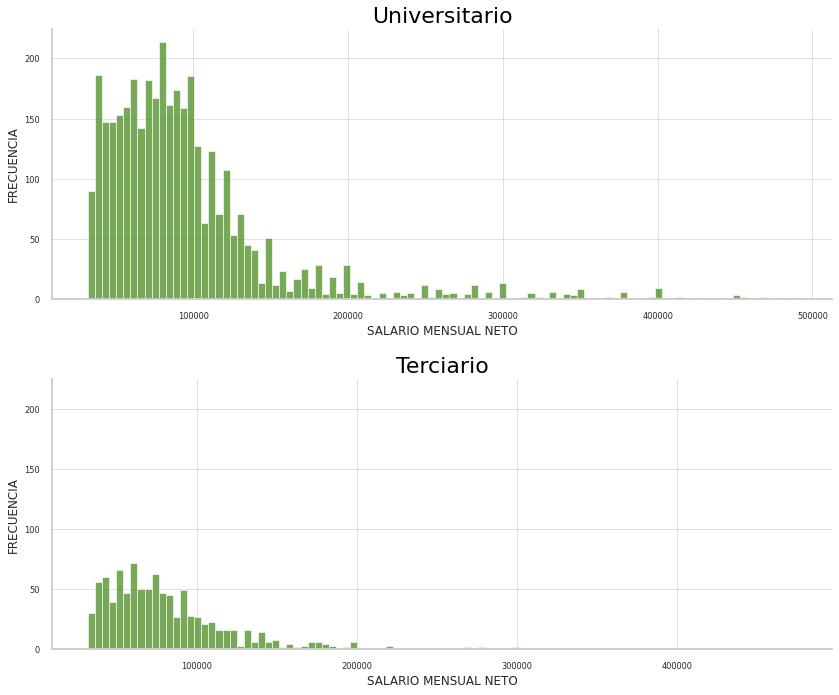

In [ ]:
# GRAFICO 1: comparamos la distribución de salario de cada categoría.

fig, axes = plt.subplots(nrows=2, figsize=(12, 10), sharey=True) ## sharey=True
sns.set_context("talk")
PiYG_r = sns.color_palette("PiYG_r", 10)
sns.set_palette(PiYG_r)
#sns.palplot(PiYG_r)

p = sns.histplot(universitario_arr , bins=100, ax=axes[0])
p.set_title("Universitario", size=22, color='black')
p.set_xlabel("SALARIO MENSUAL NETO", size = 12)
p.set_ylabel("FRECUENCIA", size = 12) 

j = sns.histplot(terciario_arr, bins=100, ax=axes[1])
j.set_title("Terciario", size=22, color='black')
j.set_xlabel("SALARIO MENSUAL NETO", size = 12)
j.set_ylabel("FRECUENCIA", size = 12) 

plt.tight_layout()
sns.despine()

Se observa que ambas subpoblaciones tienen distribuciones asimétricas, siendo que la cola de la categoría Universitaria es mucho más larga que la de Terciaria.

**MEDIDAS DE CENTRALIDAD Y DISPERSIÓN**

In [ ]:
fil_studies_df[[group_col,salary_net]].groupby(group_col).describe().round()

salary_monthly_NETO                                      \
                                    count     mean      std      min      25%   
profile_studies_level                                                           
Terciario                           963.0  84166.0  50812.0  32000.0  53464.0   
Universitario                      3568.0  96147.0  60142.0  32000.0  60000.0   

                                                    
                           50%       75%       max  
profile_studies_level                               
Terciario              72000.0   96500.0  475000.0  
Universitario          83000.0  110000.0  490000.0

In [ ]:
#Calculo medianas para cada subpoblación

fil_studies_df[[group_col,salary_net]].groupby(group_col).median()

,salary_monthly_NETO
profile_studies_level,
Terciario,72000.0
Universitario,83000.0


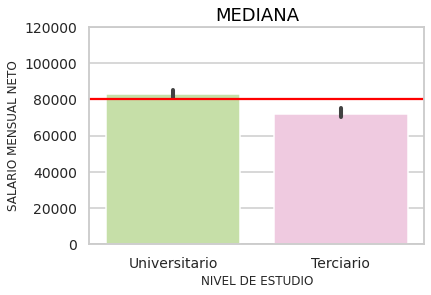

In [ ]:
#Graficamos la mediana para cada subpoblación. 
#La linea roja representa la mediana para toda la muestra (independientemente del nivel de estudios)

median_salary=df_clean[salary_net].median() 
sns.barplot(x=group_col, y=salary_net, data=fil_studies_df, estimator=numpy.median, palette="PiYG_r")
plt.title("MEDIANA", size=18, color='black')
plt.axhline(y=median_salary, color='r', linestyle='-')
plt.ylim(0,120000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("NIVEL DE ESTUDIO", size = 12)
plt.ylabel("SALARIO MENSUAL NETO", size = 12)
plt.show()  

In [ ]:
#Calculo medianas para cada subpoblación

fil_studies_df[[group_col,salary_net]].groupby(group_col).mean()

,salary_monthly_NETO
profile_studies_level,
Terciario,84165.960748
Universitario,96147.019602


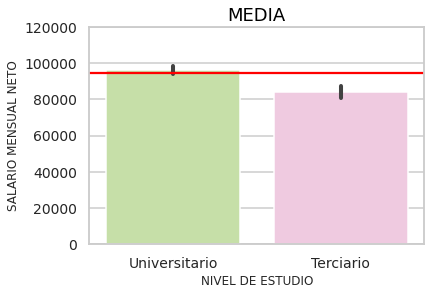

In [ ]:
#Graficamos la media para cada subpoblación. 
#La linea roja representa la media para toda la muestra (independientemente del nivel de estudios)

mean_salary=df_clean[salary_net].mean()
sns.barplot(x=group_col, y=salary_net, data=fil_studies_df, estimator=numpy.mean, palette="PiYG_r")
plt.title("MEDIA", size=18, color='black')
plt.axhline(y=mean_salary, color='r', linestyle='-')
plt.ylim(0,120000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("NIVEL DE ESTUDIO", size = 12)
plt.ylabel("SALARIO MENSUAL NETO", size = 12)
plt.show()  

**INDEPENDENCIA DE VARIABLES**

Para determinar si las varriables nivel de estudios y salario neto son independientes nos fijamos si la probabilidad de que alguien tenga salario superior a la media de la población dado que es universitario es igual a la probabilidad de que alguien tenga salario medio superior a la media.

Es decir, si P(A|B) = P(A). Si bien que esta condición se cumpla no implica que las variables sean independientes; si la condición no se cumple, podemos decir que no son independientes. 

In [ ]:
#Calculamos el salario medio para la población completa
avg_salary = df_clean[salary_net].mean()  #salario promedio
avg_salary

94486.01477368624

In [ ]:
#Calculamos la probabilidad general de ganar por encima del salario medio; ie P(A)
prob_above_avg = len(df_clean[df_clean[salary_net] >= avg_salary]) / len(df_clean) #consideramos: "cobrar más"<-> cobrar más que el promedio 
prob_above_avg

0.3709244342155735

In [ ]:
is_above_avg = df_clean[salary_net] > avg_salary
terc = df_clean[group_col] == "Terciario"
intersection_count = len(df_clean[is_above_avg & terc])

In [ ]:
#Calculamos la probabilidad general de ganar por encima del salario medio dado que pertence al nivel terciario; ie P(A|B)
p_condic_above_avg = len(df_clean[is_above_avg & terc])/len(df_clean[terc])
print(p_condic_above_avg)

0.2720664589823468


In [ ]:
is_above_avg = df_clean[salary_net] > avg_salary
uni = df_clean[group_col] == "Universitario"
intersection_count = len(df_clean[is_above_avg & uni])

In [ ]:
#Calculamos la probabilidad general de ganar por encima del salario medio dado que pertence al nivel universitario; ie P(A|B)
p_condic_above_avg = len(df_clean[is_above_avg & uni])/len(df_clean[uni])#Calculo la probabilidad de cobrar más que el promedio dado que tengo estudios universitarios.
print(p_condic_above_avg)

0.38873318385650224


La probabilidad de cobrar un salario superior al promedio es del 34,6%. Debido a que la prob. de ganar más dado que presentan estudios universitarios es levemente superior (36%), consideramos que no son independientes. Por otra parte, la probabilidad de cobrar más que el promedio dado que se presentan estudios terciarios es menor (25%). 

De esta manera, no se cumple la condición de que P(A|B) = P(B). De esta manera, podemos decir que NO son independientes.

## d) Densidad Conjunta condicional

**Consigna:** Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


A continuación se seleccionan dos variables numércias y una categórica para estudiar su dipersión

Variables numéricas:

- Salario Neto: `` salary_monthly_NETO ``
- Años de Experiencia: `` profile_years_experience ``

Variable categórica:
- Genero: ``profile_gender ``

Queremos eliminar aquellos valores extremos en los años de experiencia. Observamos que el 99% de los resultados indican un nivel de experiencia menor a 30 años. Por este motivo quitaremos los elementos de la muestra que superen ese valor.

In [ ]:
df["profile_years_experience"].quantile(0.99) 

30.0

In [ ]:
filtered_experience_df = df_clean[(df_clean.profile_years_experience < 30)]
filtered_experience_df[:3]

,salary_monthly_BRUTO,salary_monthly_NETO,profile_gender,profile_age,profile_years_experience,work_years_in_company,profile_studies_level
0,53000.0,43000.0,Mujer,26,3.0,3.0,Universitario
1,79000.0,63000.0,Hombre,29,5.0,2.0,Universitario
2,160000.0,127000.0,Mujer,22,2.0,0.0,Secundario


En el siguiente gráfico se observa la relacion entre el salario mensual neto y los años de experiencia con respecto al género.
Por una lado se visualiza, que la mayoría de las personas ganan por debajo de los 200000, independientemente de los años de experiencia.
Por otro lado, quienes poseen salarios más altos son los hombres que tienen entre 4 y 20 años de experiencia. Además, son excepcionales los casos en que las mujeres cobran por encima de los 200000. 

Text(0.5, 1.0, 'Gráfico de dispersión')

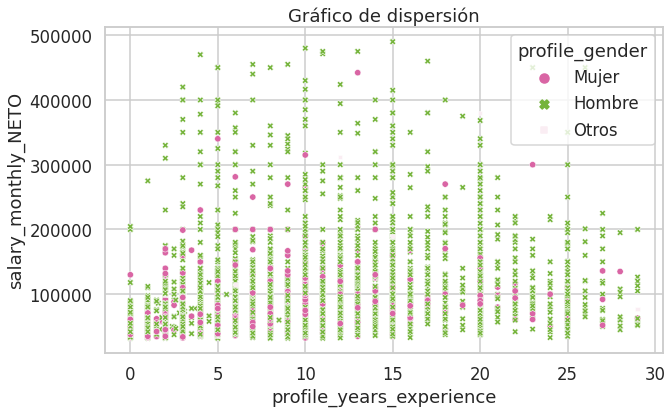

In [ ]:
#Grafico de dispersión diferenciado por genero

plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered_experience_df, y='salary_monthly_NETO',
                 x='profile_years_experience', 
                hue='profile_gender', style='profile_gender', palette = color_hue,s=40)
plt.title("Gráfico de dispersión")

Para concluir, este gráfico nos permite visualizar que:

*  Quienes tienen muchos años de experiencia (más de 25) tienden a ganar menos.
*  Las mujeres tienden a tener menos años de experiencia. 
*  Los salarios más altos suelen corresponderse con el genero masculino